# Scrapy  
***    
 - Scrapy is written in pure python.
 - still need to define page templates, give it locations to start scraping from, and define URL patterns for the pages that you’re looking for  

<br>  
<font color=gray>파이썬3 을 지원하지 않았으나 이제 3.3이상 지원.  
 - scrapy에서 페이지 템플릿을 만들고, 시작할 위치지정, 찾으려는 URL 패턴정의 해야한다. </font>

# Installing Scrapy  
***  
installation method that I prefer is through the Anaconda package manager.  
 - conda install -c conda-forge scrapy  

<br> 
or pip install Scrapy
  - lxml, an efficient XML and HTML parser  
  - parsel, an HTML/XML data extraction library written on top of lxml  
  - w3lib, a multi-purpose helper for dealing with URLs and web page encodings  
  - twisted, an asynchronous networking framework  
  - cryptography and pyOpenSSL, to deal with various network-level security needs  
  <br>  
 <font color=gray>pip 설치해도되나 의존성문제나 버전충돌로인해 아나콘다 패키지 관리자를 추천.  
 - conda install -c conda-forge scrapy  
 - 또는 가상환경에서 pip install scrapy. 
 - mac에서 콘다 설치후 가상환경에서 pip install scrapy </font>

In [3]:
# !conda install -c conda-forge scrapy

failed

CondaError: KeyboardInterrupt



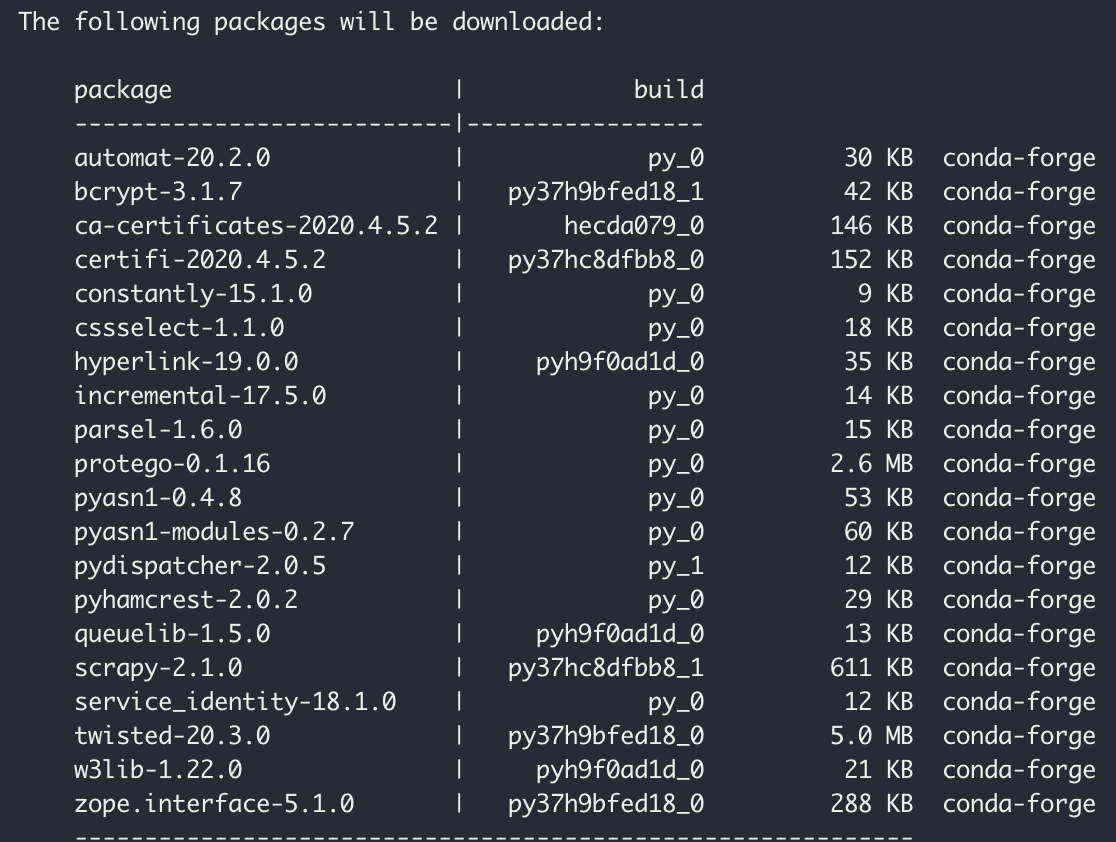

 - To create a new spider in the current directory  
 $ scrapy startproject wikiSpider
 
 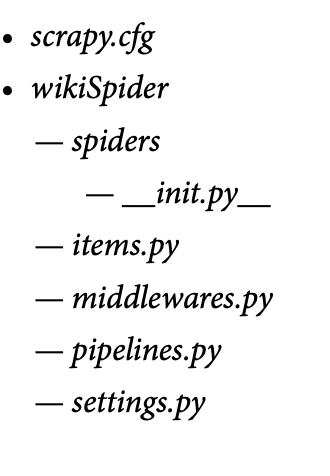  
 
<br>  
<font color=gray>Scrapy에서 각프로젝트를 하나의 스파이더라 부른다.  
 - $ scrapy startproject wikiSpider </font>

In [6]:
!scrapy startproject wikiSpider

New Scrapy project 'wikiSpider', using template directory '/Users/j/handsonml/my_env/lib/python3.7/site-packages/scrapy/templates/project', created in:
    /Users/j/handsonml/wikiSpider

You can start your first spider with:
    cd wikiSpider
    scrapy genspider example example.com


# Writing a Simple Scraper  
***  
To create a crawler  
 - Add a new file inside the spiders directory at wikiSpider/wikiSpider/spiders/article.py. In your newly created article.py file.  
 - For large sites with many types of content, you might have separate Scrapy items for each type (blog posts, press releases, articles, etc.), each with different fields, but all running under the same Scrapy project.  
 <br>  
 - two functions <font color=pink>start_requests</font> and <font color=pink>parse</font>.  
  - <font color=pink>start_requests</font> is a Scrapy-defined entry point to the program used to generate Request objects that Scrapy uses to crawl the website.  
  - <font color=pink>parse</font> callback function defined by the user, and is passed to the Request object with <font color=pink>callback=self.parse</font>. for now it prints the title of the page.  

<br>  
<font color=gray>문서 article 크롤링을 담당.  
 - 다양한 콘텐츠가 있는 대규모 사이트를 스크랩 할떄 블로그 게시물,보도자료,문서,등 각유형에 따라 스파이더를 따루둔다.  
 - 스파이더이름은 프로젝트내에서 고유해야 한다.  

이 스파이더의 핵심은 <font color=pink>start_requests</font> 와 <font color=pink>parse</font>   
 - <font color=pink>start_requests</font>는 웹을 크롤링할떄 사용하는 <font color=pink>Requests</font>객체를 생성하는 프로그램에대해 scrapy가 정의하는 진입점.  
 - <font color=pink>parse</font>는 사용자가 정의한 콜백 함수이다. <font color=pink>callback=self.parse</font>를 사용하여 <font color=pink>Requests</font>객체로 전달. 여기서는 제목을 출력. </font>  


#### article.py  
 - <br>  
<font color=gray>나열된 세페이지에서 제목 수집후 종료.</font>

In [ ]:
import scrapy

class ArticleSpider(scrapy.Spider):
    name='article'

    def start_request(self):
        urls = [
            "http://en.wikipedia.org/wiki/Python_%28programming_language%29",
            "https://en.wikipedia.org/wiki/Functional_programming",
            "https://en.wikipedia.org/wiki/Monty_Python"]
        return [scrapy.Request(url=url, callback=self.parse) for url in urls]

    def parse(self, response):
        url = response.url
        title = response.css('h1::text').extract_first()
        print('URL is: {}'.format(url))
        print('Title is: {}'.format(title))

In [ ]:
!scrapy runspider ~/handsonml/wikiSpider/wikiSpider/spiders/article.py

 - scraper goes to the three pages listed as the <font color=pink>start_urls</font>, gathers information, and then terminates.  
 
  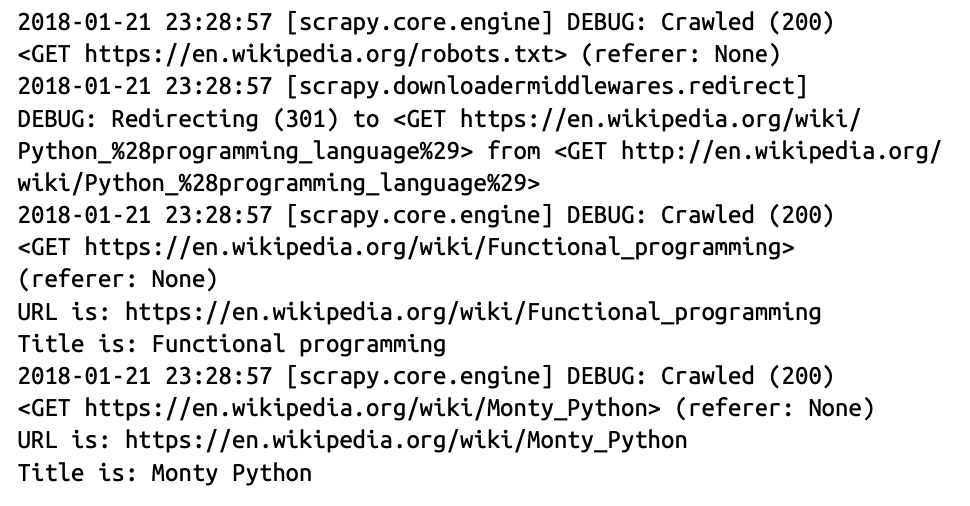

# Spidering with Rules  
***  
spider in the previous section isn’t much of a crawler, scraping only the list of URLs it’s provided.  
 - no ability to seek new pages on its own  
 - To turn it into a fully fledged crawler, you need to use the <font color=pink>CrawlSpider class</font>  

<br>  
<font color=gray>규칙에 의한 스파이더.  
 - article.py는 URL 목록 스크랩 새로운페이지 찾을수 없다.   
  - CrawlSpider class를 사용해야한다.  
 - <font color=pink>ArticleSpider</font> class는 <font color=pink>CrawlSpider class</font>를 확장한다.  
  - <font color=pink>start_urls</font>: 크롤링 시작점. 
  - <font color=pink>allowed_domains</font> 허용되는 링크 또는 무시해야하는 도메인   
     - 정규표현식 .$*$ -> 모든 URL 허용.  
  - 제목과 URL 
  - 각페이지의 텍스트는 <font color=pink>XPath</font> 사용, $<a></a>$ 테그같은 하위 태그의 텍스트를 검색할떄 사용.   
    <font color=pink>CSS</font> 사용시 하위태크내의 텍스트 모두무시.  
  - 마지막 업데이트날짜 문자열은 footer에서 파싱하며 lastUpdated 변수에 저장.</font> 

 - <font color=pink>ArticleSpider</font> extends the <font color=pink>CrawlSpider class</font>.  
  - Rather than providing a <font color=pink>start_requests function</font>, it provides a list of <font color=pink>start_urls</font> and <font color=pink>allowed_domains</font>.  
  - This tells the spider where to start crawling from and whether it should follow or ignore a link based on the domain.  
  - list of rules is also provided. instructions on which links to follow or ignore.   
  (allowing all URLs with the regular expression .* )  
  
  <br>  
 - <font color=pink>parse_items</font>
  - extracting the title and URL on each page.  
  - text content of each page is extracted using an <font color=pink>XPath selector</font>.  
  often used when retrieving text content including text in child tags   
  (for example, an <font color=pink> $<$a$>$ </font>  tag inside a block of text).  
  <font color=pink>CSS selector</font> to do this, all text within child tags will be ignored.  
  
 

#### articles.py 
 - following all links under the domain wikipedia.org, printing titles of pages, and ignoring all external (offsite) links  
 
<br>  
<font color=gray>모든 도메인 링크를 따라 페이지 제목 프린트하고, 외부링크는 무시 wiki내에서 탐색.</font>

In [ ]:
# articles.py
# from scrapy.contrib.linkextractors import LinkExtractor # depretiated
# from scrapy.contrib.spiders import CrawlSpider, Rule
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule

class ArticleSpider(CrawlSpider):
    name = 'articles'
    allowed_domains = ['wikipedia.org']
    start_urls = ['https://en.wikipedia.org/wiki/Benevolent_dictator_for_life']
    rules = (Rule(LinkExtractor(allow=r'.*'), callback='parse_items', follow=True),)

    def parse_items(self, response):
        url = response.url
        title = response.css('h1::text').extract_first()
        text = response.xpath('//div[@id="mw-content-text"]//text()').extract()
        lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
        lastUpdated = lastUpdated.replace('This page was last edited on ', '')
        print('URL is: {}'.format(url))
        print('title is: {} '.format(title))
        print('text is: {}'.format(text))
        print('Last updated: {}'.format(lastUpdated))

In [ ]:
!scrapy runspider ~/handsonml/wikiSpider/wikiSpider/articles.py

#### SyntaxError: unexpected EOF while parsing  
 - 철자, 따옴표 여닫기, 괄호 여닫기가 제대로 되었는지 확인  

#### TypeError: 'Rule' object is not iterable  
 - rules = (Rule(LinkExtractor(allow=r'.*'), callback='parse_items', follow=True),) or. 
 - rules = [Rule(LinkExtractor(allow=r'.*'), callback='parse_items', follow=True)]
  
halt execution by using Ctrl-C or by closing the terminal  

<br>  
<font color=gray>ctrl+c 로 정지시킨다.</font>

#### rules = [Rule(LinkExtractor(allow=r'.*'), callback='parse_items', follow=True)]  
 - line provides a list of Scrapy Rule objects  
 - When multiple rules are in place, each link is checked against the rules in order.  
 - first rule that matches is the one that is used to deter‐ mine how the link is handled  
  - link_extractor (only mandatory argument, a <font color=pink>LinkExtractor</font> object.) 
  - callback (used to parse the content on the page) 
  - cb_kwargs  (dictionary is formatted as {arg_name1: arg_value1, arg_name2: arg_value2})
  - follow  (whether you want links found at that page to be included in a future crawl  
  (no callback function is provided, defaults to True )  

<br>  
#### LinkExtractor  
 - simple class designed solely to recognize and return links in a page of HTML content based on the rules provided.  
  - allow  (Allow all links that match the provided regular expression.)
  - deny  (Deny all links that match the provided regular expression.)  


<font color=gray>찾은 링크를 검사하는 <font color=pink>Rule</font> 객체 리스트.  
 - 각링크는 규칙 순서대로 검사.  
 - <font color=pink>LinkExtractor</font> 필수 매개변수. 
 - <font color=pink>callback</font> 페이지 내용을 파싱하기위한 함수.
 - <font color=pink>cb_kwargs</font> 콜백 함수에 전달할 매개변수 딕셔너리 
 - <font color=pink>follow</font> 현재 페이지의 링크를 향후 크롤링에 포함 여부. 아니라면(기본값 true)</font> 

#### articlesMoreRules.py  
- Can create a spider that crawls Wikipedia, identifying all article pages and flagging nonarticle pages.  
- Rules 
 1. All article pages (pages that start with /wiki/ and do not contain a colon)  
 2. are passed to the parse_items function with default parameter <font color=pink>is_article=True</font>  
 3. other nonarticle links are passed to the <font color=pink>parse_items</font>  function with the argument <font color=pink>is_article=False</font> .

In [ ]:
# articlesMoreRules.py
# from scrapy.contrib.linkextractors import LinkExtractor # depretiated
# from scrapy.contrib.spiders import CrawlSpider, Rule
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule

class ArticleSpider(CrawlSpider):
    name = 'articles'
    allowed_domains = ['wikipedia.org']
    start_urls = ['https://en.wikipedia.org/wiki/Benevolent_dictator_for_life']
    rules = [
        Rule(LinkExtractor(allow='^(/wiki/)((?!:).)*$'), callback='parse_items', follow=True, cb_kwargs={'is_article': True}),
        Rule(LinkExtractor(allow='.*'), callback='parse_items', cb_kwargs={'is_article': False})
    ]

    def parse_items(self, response, is_article):
        print(response.url)
        title = response.css('h1::text').extract_first()
        if is_article:
            url = response.url
            text = response.xpath('//div[@id="mw-content-text"]//text()').extract()
            lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
            lastUpdated = lastUpdated.replace('This page was last edited on ', '')
            print('Title is: {} '.format(title))
            print('title is: {} '.format(title))
            print('text is: {}'.format(text))
        else:
            print('This is not an article: {}'.format(title))

In [28]:
!scrapy runspider ~/handsonml/wikiSpider/wikiSpider/articlesMoreRules.py

2020-06-12 01:48:11 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-06-12 01:48:11 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.7 (default, Mar 26 2020, 10:32:53) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-06-12 01:48:11 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-06-12 01:48:11 [scrapy.crawler] INFO: Overridden settings:
{'EDITOR': '/usr/local/bin/nvim', 'SPIDER_LOADER_WARN_ONLY': True}
2020-06-12 01:48:11 [scrapy.extensions.telnet] INFO: Telnet Password: e523e5456a50bfcb
2020-06-12 01:48:11 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-06-12 01:48

2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsite request to 'donate.wikimedia.org': <GET https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en>
2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsite request to 'shop.wikimedia.org': <GET https://shop.wikimedia.org>
2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsite request to 'www.wikidata.org': <GET https://www.wikidata.org/wiki/Special:EntityPage/Q11271>
2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsite request to 'creativecommons.org': <GET https://creativecommons.org/licenses/by-sa/3.0/>
2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsite request to 'foundation.wikimedia.org': <GET https://foundation.wikimedia.org/wiki/Terms_of_Use>
2020-06-12 01:48:12 [scrapy.spidermiddlewares.offsite] DEBUG: Filtered offsi

2020-06-12 01:48:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Dolibarr> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://pt.wikipedia.org/wiki/Benevolent_Dictator_for_Life
This is not an article: None
https://no.wikipedia.org/wiki/Benevolent_Dictator_For_Life
This is not an article: Benevolent Dictator For Life
https://pl.wikipedia.org/wiki/Benevolent_Dictator_for_Life
This is not an article: Benevolent Dictator for Life
2020-06-12 01:48:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://it.wikipedia.org/wiki/Benevolo_Dittatore_a_Vita> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
2020-06-12 01:48:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://ja.wikipedia.org/wiki/%E5%84%AA%E3%81%97%E3%81%84%E7%B5%82%E8%BA%AB%E3%81%AE%E7%8B%AC%E8%A3%81%E8%80%85> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
2020-06-12 01:48:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET 

2020-06-12 01:48:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Main_Page> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
2020-06-12 01:48:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/w/index.php?title=Benevolent_dictator_for_life&action=info> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://en.wikipedia.org/wiki/Portal:Current_events
This is not an article: Portal:Current events
2020-06-12 01:48:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (302) to <GET https://en.wikipedia.org/wiki/Joseph_Girard_(Swiss_politician)> from <GET https://en.wikipedia.org/wiki/Special:Random>
2020-06-12 01:48:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Special:SpecialPages> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://en.wikipedia.org/wiki/Wikipedia:Contents
This is not an article: Wikipedia:Contents
https://

2020-06-12 01:48:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Blender_Foundation> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://en.wikipedia.org/wiki/F_Sharp_Software_Foundation
This is not an article: F Sharp Software Foundation
https://en.wikipedia.org/w/index.php?title=Benevolent_dictator_for_life&action=edit&section=3
This is not an article: Editing Benevolent dictator for life (section)
https://en.wikipedia.org/wiki/Wolfram_Research
This is not an article: Wolfram Research
https://en.wikipedia.org/wiki/Blender_Foundation
This is not an article: Blender Foundation
2020-06-12 01:48:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/w/index.php?title=Benevolent_dictator_for_life&action=edit&section=2> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
2020-06-12 01:48:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Canonical_Ltd> (referer: http

https://en.wikipedia.org/wiki/Linux_(kernel)
This is not an article: Linux kernel
2020-06-12 01:48:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Mark_Shuttleworth> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
2020-06-12 01:48:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Ton_Roosendaal> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://en.wikipedia.org/wiki/Mark_Shuttleworth
This is not an article: Mark Shuttleworth
https://en.wikipedia.org/wiki/Ton_Roosendaal
This is not an article: Ton Roosendaal
2020-06-12 01:48:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Theo_de_Raadt> (referer: https://en.wikipedia.org/wiki/Benevolent_dictator_for_life)
https://en.wikipedia.org/wiki/Theo_de_Raadt
This is not an article: Theo de Raadt
2020-06-12 01:48:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Linux> (refere

# Creating Items  
***  
 - Scrapy also provides useful tools to keep your collected items organized and stored in custom objects with well-defined fields.
 
<br>  
<font color=gray>찾은 링크를 검사하는 <font color=pink>Rule</font> 객체 리스트.</font>

####  items.py  
 - defining three fields that will be collected from each page:   
  1. a title,   
  2. URL,   
  3. the date the page was last edited  
   
   
 - If you are collecting data for multiple page types, you should define each separate type as its own class in items.py  
 - If your items are large, or you start to move more parsing functionality into your item objects.  
 
<br>  
<font color=gray>수집된 항목을 사용자 지정 개체에 저장하기위해   
 - <font color=green>items.py</font> 파일 안에 <font color=pink>Article</font> class를 만든다.  
  - 각페이지에서 수집할 제목, URL, 최종수정일 세가지 필드 생성</font>

In [75]:
# -*- coding: utf-8 -*-

# Define here the models for your scraped items
#
# See documentation in:
# http://doc.scrapy.org/en/latest/topics/items.html

import scrapy


class Article(scrapy.Item):
    url = scrapy.Field()
    title = scrapy.Field()
    text = scrapy.Field()
    lastUpdated = scrapy.Field()

#### articleItems.py
- changes that were made to the <font color=pink>ArticleSpider</font> class in order to create the new <font color=pink>Article</font> item.  

<br>  
<font color=gray>Scrapy 디버깅 데이터와 함꼐 각문서 항목이 파이썬 딕셔너리 형태로 출력된다.</font>  
  
  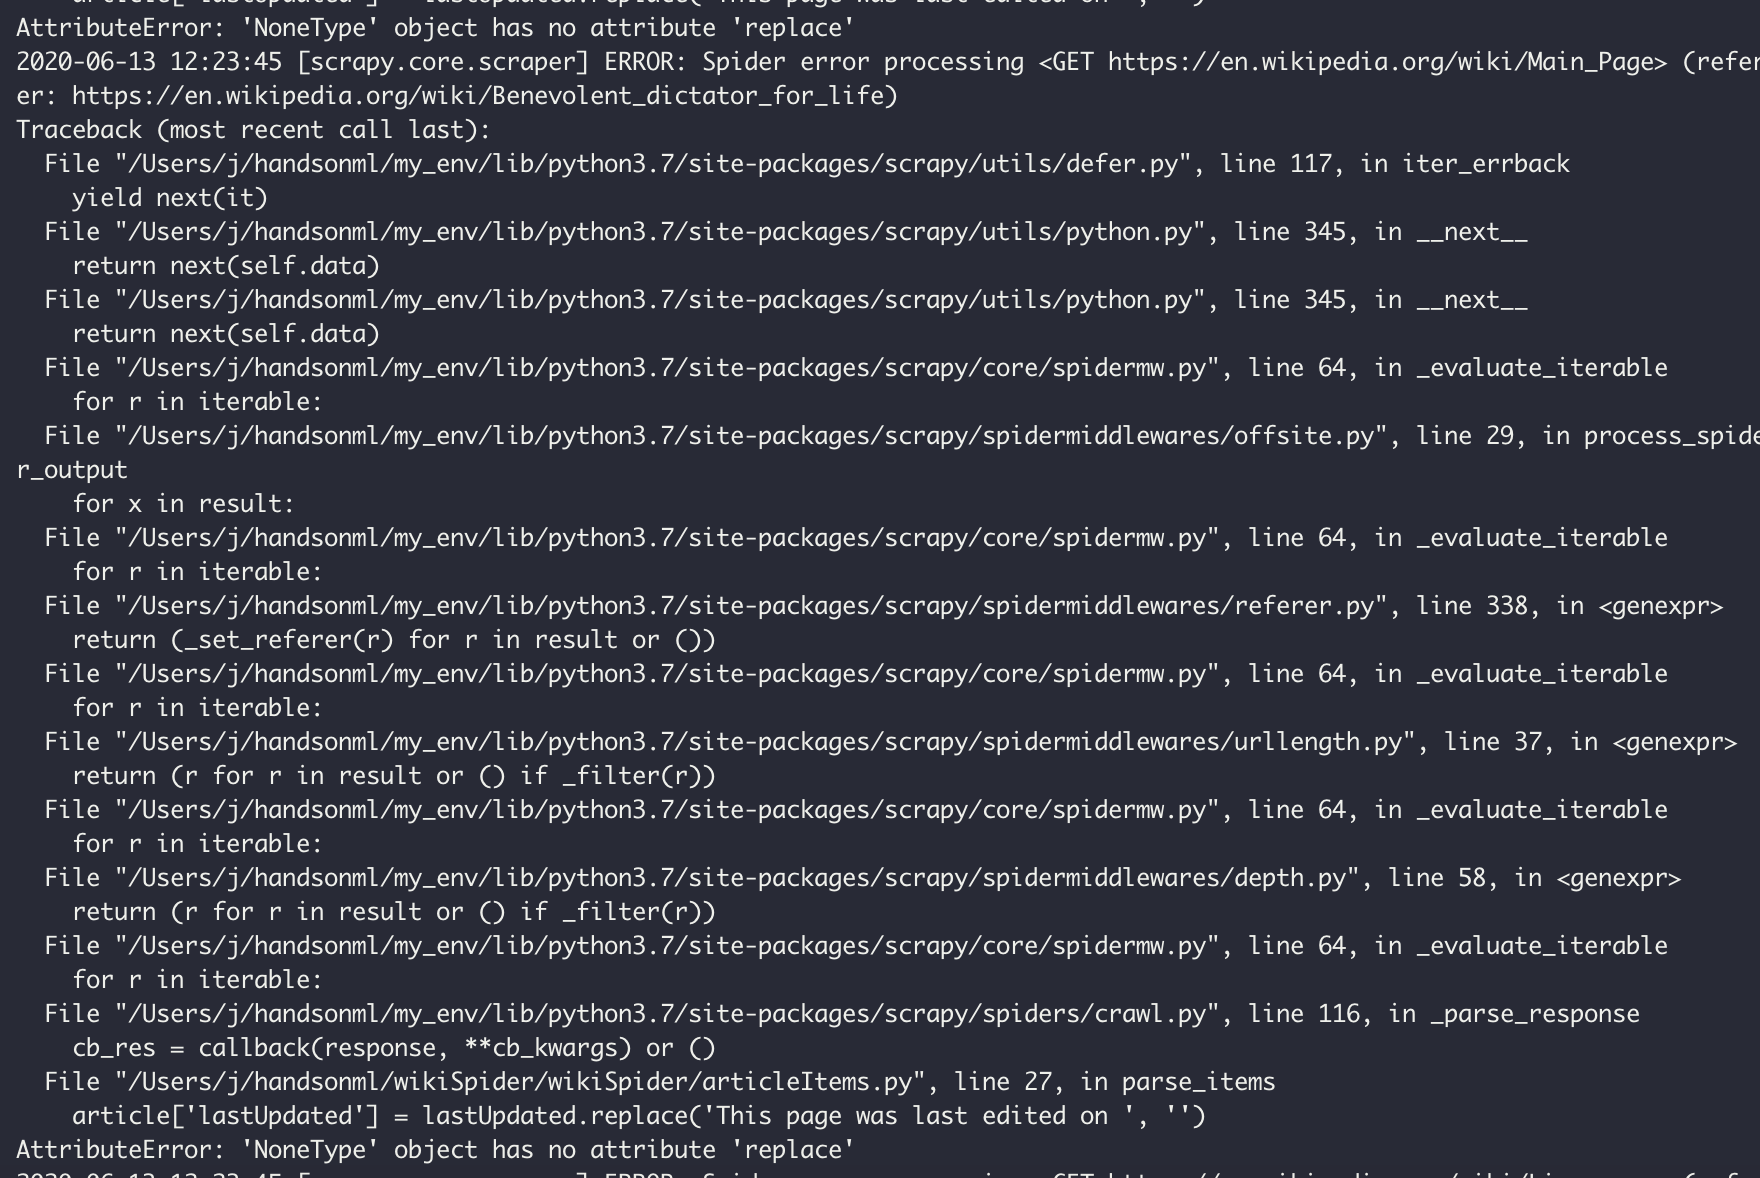

In [114]:
# from scrapy.contrib.linkextractors import LinkExtractor
# from scrapy.contrib.spiders import CrawlSpider, Rule
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule
from wikiSpider.wikiSpider.items import Article

class ArticleSpider(CrawlSpider):
    name = 'articleItems'
    allowed_domains = ['wikipedia.org']
    start_urls = ['https://en.wikipedia.org/wiki/Benevolent_dictator_for_life']
    rules = [
#         Rule(LinkExtractor(allow='(/wiki/)((?!:).)*$'), callback='parse_items', follow=True),
        Rule(LinkExtractor(allow='en.wikipedia.org/wiki((?!:).)*$'), callback='parse_items', follow=True),
    ]

    def parse_items(self, response):
        article = Article()
        article['url'] = response.url
#         article['title'] = response.css('h1::text').extract_first()
        article['title'] = response.css('h1::text').get()
#         article['text'] = response.xpath('//div[@id="mw-content-text"]//text()').extract()
        article['text'] = response.xpath('//div[@id="mw-content-text"]//text()').getall()
#         lastUpdated = response.css('li#footer-info-lastmod::text').extract_first()
        lastUpdated = response.css('li#footer-info-lastmod::text').get()
        article['lastUpdated'] = lastUpdated.replace('This page was last edited on ', '')
        return article

In [116]:
from wikiSpider.items import Article

ModuleNotFoundError: No module named 'wikiSpider.items'

In [117]:
!scrapy runspider ~/handsonml/wikiSpider/wikiSpider/articleItems.py

2020-06-12 22:54:06 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-06-12 22:54:06 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.7 (default, Mar 26 2020, 10:32:53) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-06-12 22:54:06 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
Usage
=====
  scrapy runspider [options] <spider_file>

runspider: error: Unable to load '/Users/j/handsonml/wikiSpider/wikiSpider/articleItems.py': No module named 'wikiSpider'



In [87]:
!scrapy runspider -h

Usage
=====
  scrapy runspider [options] <spider_file>

Run the spider defined in the given file

Options
--help, -h              show this help message and exit
-a NAME=VALUE           set spider argument (may be repeated)
--output=FILE, -o FILE  dump scraped items into FILE (use - for stdout)
--output-format=FORMAT, -t FORMAT
                        format to use for dumping items with -o

Global Options
--------------
--logfile=FILE          log file. if omitted stderr will be used
--loglevel=LEVEL, -L LEVEL
                        log level (default: DEBUG)
--nolog                 disable logging completely
--profile=FILE          write python cProfile stats to FILE
--pidfile=FILE          write process ID to FILE
--set=NAME=VALUE, -s NAME=VALUE
                        set/override setting (may be repeated)
--pdb                   enable pdb on failure


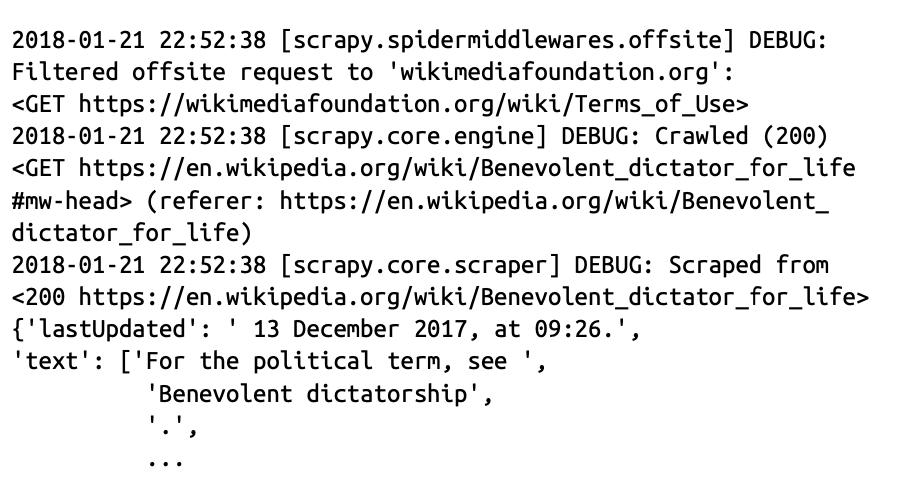

# Outputting Items  
***
 settings.py 세줄 주석치고 실행.  
 
Scrapy uses the Item objects to determine which pieces of information it should save from the pages it visits.  
 - can be saved by Scrapy in a variety of ways, such as CSV, JSON, or XML files.  
  - \$ scrapy runspider articleItems.py -o articles.csv -t csv   
  - \$ scrapy runspider articleItems.py -o articles.json -t json   
  - \$ scrapy runspider articleItems.py -o articles.xml -t xml  
 - scraper <font color=pink>articleItems</font> and writes the output in the specified format to the provided file.   

<br>  
<font color=gray>CSJ, JSON, XML로 저장 </font>

#### CSV

  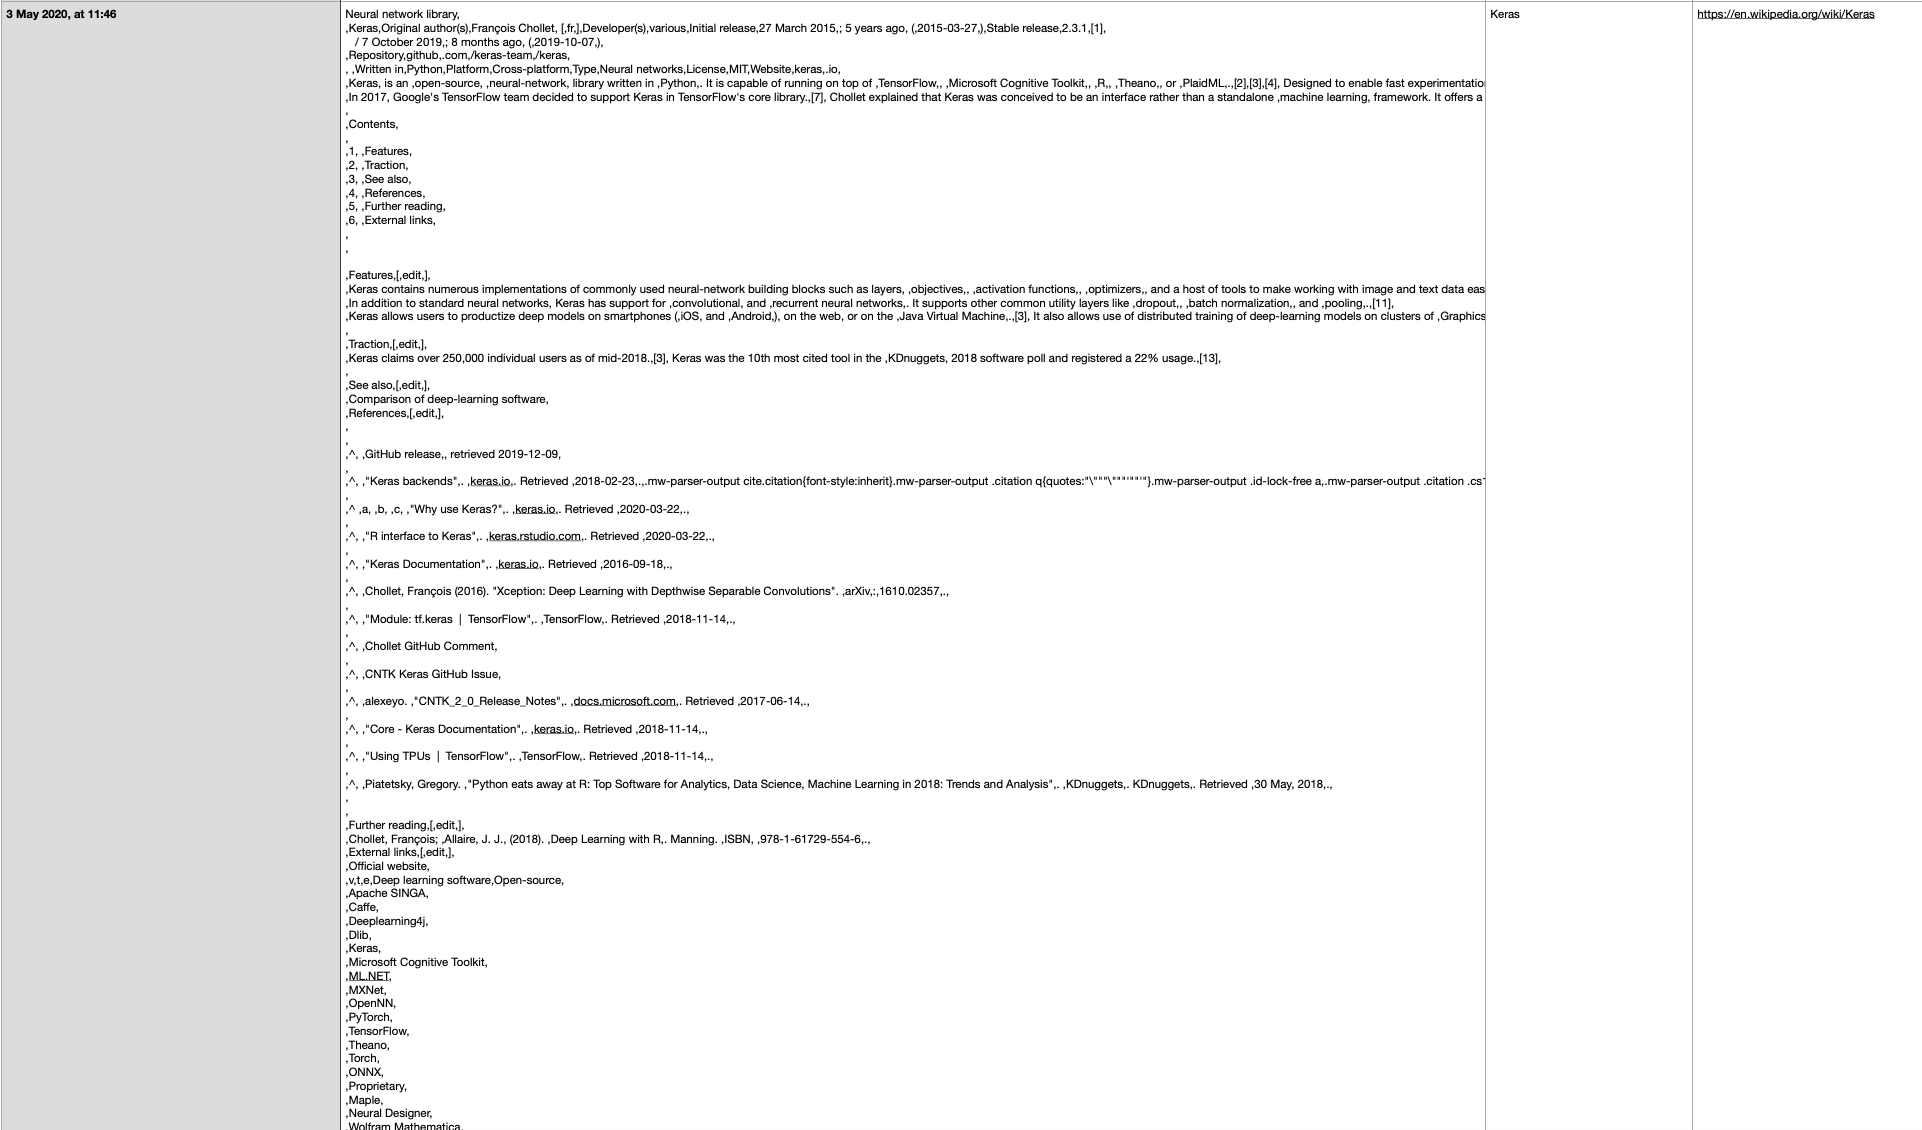

 #### JSON   
 
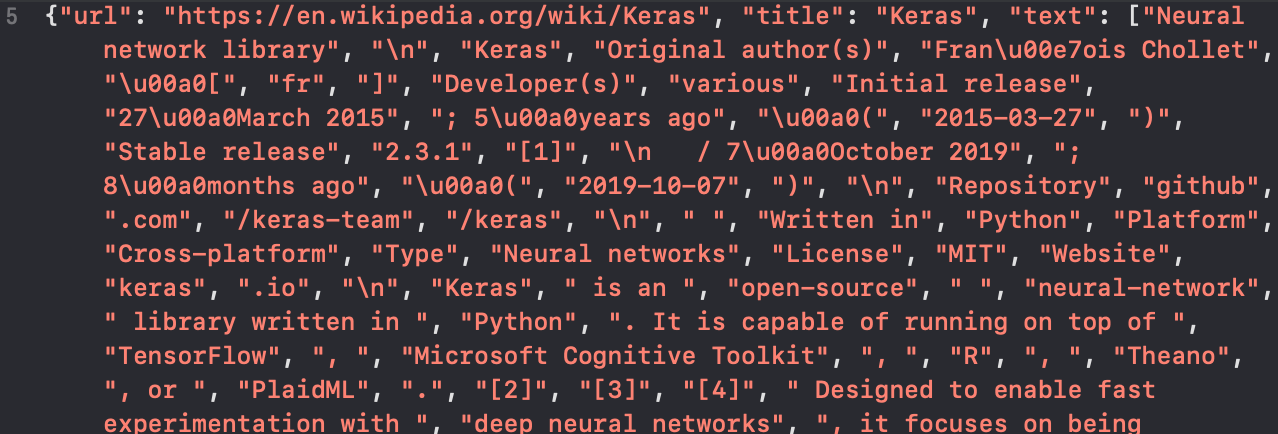

#### XML  

  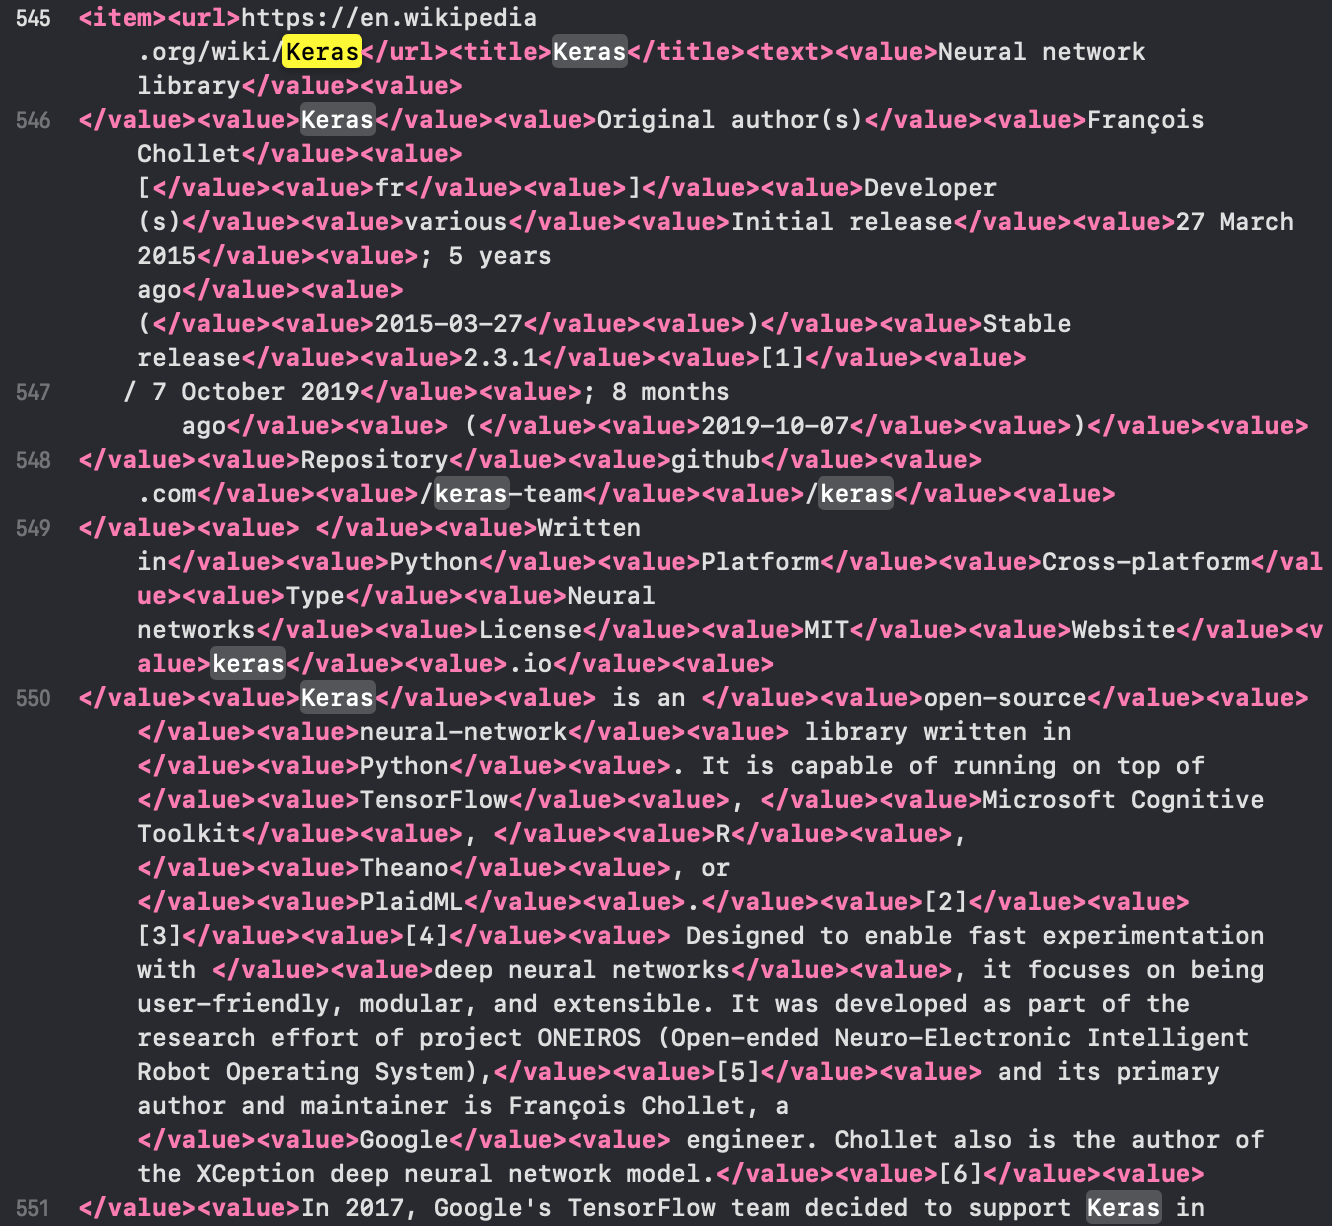

In [111]:
!scrapy runspider ~/handsonml/wikiSpider/wikiSpider/articleItems.py -o articles.csv -t csv

/Users/j/handsonml/my_env/lib/python3.7/site-packages/scrapy/commands/runspider.py:57: ScrapyDeprecationWarning: The -t command line option is deprecated in favor of specifying the output format within the -o option, please check the -o option docs for more details
  feeds = feed_process_params_from_cli(self.settings, opts.output, opts.output_format)
2020-06-12 15:11:14 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-06-12 15:11:14 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.7 (default, Mar 26 2020, 10:32:53) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-06-12 15:11:14 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
Usage
=====
  scrapy runspider [options] <spider_file>

runspider: error: Unable to load '/Users/j/handsonml/wikiSp

# The Item Pipeline  
***  
using Scrapy’s item pipeline can improve the speed of your web scraper even further  
 - performing all data processing while waiting for requests to be returned,  
 - rather than waiting for data to be processed before making another request.  

To create an item pipeline, revisit the <font color=green>settings.py</font> file.  
 - Uncomment the last three lines and replace with the following:
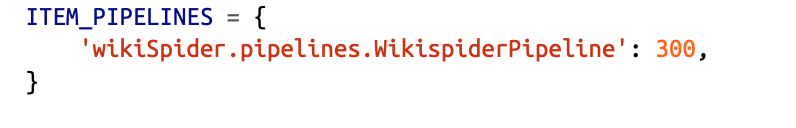  

<br>  
<font color=gray>파이프라인을 사용하면 이전요청의 데이터 처리가 완료되는 것을 기다리는 것이아니라 응답을 기다리는 동안 데이터를 처리할 수있어서 더빠르다.   
 - 데이터처리에 많은 시간이 필요할때 
 - 프로세서가 많은 계산을 수행해야 할때  
주석을 제거하면 데잍터를 처리할때 wikiSpider.pipelines.WikispiderPipeline class 를 사용한다.  
 - 데이터처리하는 클래스가 여러개일때 운선순위를 지정 우선순위에는 정수 0~1000까지 가능.</font>

#### articlePipelines.py   
***  
 - Now you need to add the pipeline class and rewrite your original spider so that the spider collects data and the pipeline does the heavy lifting of the data processing. 
 - <font color=pink>parse_items</font> is now to extract the raw data, doing as little processing as possible, so that it can be passed to the pipeline:  
 - now you need to tie the <font color=green>pipelines.py</font> file and the updated spider together by adding the pipeline.  
 
 
<br>  
<font color=gray>파이프라인 클래스 추가하고, 스파이더는 수집만담당 데이터처리는 파이프라인에서 담당하도록  
 - <font color=green>parse_items</font> 를 수정해서 스파이더가 응답을 반환하고 파이프라인에서 <font color=pink>Article</font> 객체를 만드는 방법 허용하지 않는다. 
 -  <font color=pink>parse_items</font>의 리팩터링 목표는 원시 데이터를 추출해서 파이프라인에 전달하되 데이터처리는 최소한으로 줄이는 것이다.</font>

In [118]:
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule
from wikiSpider.items import Article

class ArticleSpider(CrawlSpider):
    name = 'articlePipelines'
    allowed_domains = ['wikipedia.org']
    start_urls = ['https://en.wikipedia.org/wiki/Benevolent_dictator_for_life']
    rules = [
        Rule(LinkExtractor(allow='(/wiki/)((?!:).)*$'), callback='parse_items', follow=True),
    ]

    def parse_items(self, response):
        article = Article()
        article['url'] = response.url
        article['title'] = response.css('h1::text').extract_first()
        article['text'] = response.xpath('//div[@id="mw-content-text"]//text()').extract()
        article['lastUpdated'] = response.css('li#footer-info-lastmod::text').extract_first()
        return article

ModuleNotFoundError: No module named 'wikiSpider.items'

#### pipelines.py   
*** 
Class <font color=pink>WikispiderPipeline</font>   
 - has a method  <font color=pink>process_item</font> that takes in an <font color=pink>Article</font> object,  
 - parses the <font color=pink>lastUpdated</font> string into a Python <font color=pink>datetime</font> object,   
 - and cleans and joins the text into a single string from a list of strings.  
 
<br>  
<font color=pink>process_item</font>  is a mandatory method for every pipeline class.  
 - Scrapy uses this method to asynchronously pass <font color=pink>Items</font> that are collected by the spider.  
 
 <br>  
<font color=gray>이전예제에서 수집한 <font color=pink>lastUpdated</font>와 text를 파이프라인에서 처리.
 - <font color=pink>WikispiderPipeline</font> 클래스  
  - <font color=pink>process_item</font>은 <font color=pink>Article</font> object를 가지고와 <font color=pink>lastUpdated</font>를 문자열 .  
  - </font>

In [119]:
from datetime import datetime
from wikiSpider.items import Article
from string import whitespace

class WikispiderPipeline(object):
    def process_item(self, article, spider):
        article['lastUpdated'] = article['lastUpdated'].replace('This page was last edited on', '')
        article['lastUpdated'] = article['lastUpdated'].strip()
        article['lastUpdated'] = datetime.strptime(article['lastUpdated'], '%d %B %Y, at %H:%M.')
        article['text'] = [line for line in article['text'] if line not in whitespace]
        article['text'] = ''.join(article['text'])
        return article

ModuleNotFoundError: No module named 'wikiSpider.items'

# Logging with Scrapy  
***  
You can easily adjust the level of logging by adding a line to the <font color=green>settings.py</font> file in your Scrapy project:  
 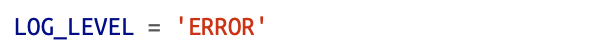  
 - Scrapy uses a standard hierarchy of logging levels, as follows:  
  - CRITICAL  
  - ERROR  
  - WARNING  
  - DEBUG  
  - INFO  
  - If logging is set to ERROR, only CRITICAL and ERROR logs will be displayed.   
  If logging is set to INFO, all logs will be displayed, and so on.  
 - $ scrapy crawl articles -s LOG_FILE=wiki.log  
  - This creates a new logfile, if one does not exist, in your current directory and outputs all logs to it, leaving your terminal clear